# Phase-1 Golden Task Breast Cancer Prediction

**#Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**#Loading the dataset**

In [2]:
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


**#Data Cleaning**

In [3]:
df.info

<bound method DataFrame.info of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35      

In [4]:
df.shape

(4024, 16)

In [5]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [22]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [23]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

**Data Visualization**

**#Number of patients in different age groups**

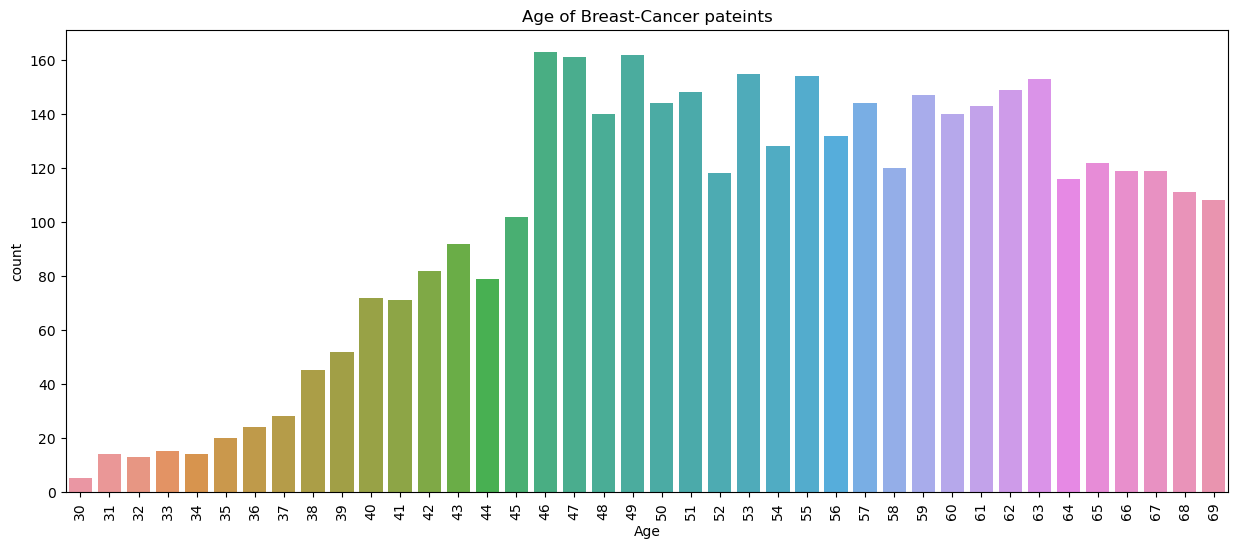

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Age', data=df)
plt.xticks(rotation = 90)
plt.title('Age of Breast-Cancer pateints')
plt.show()

**#Categorizing patients based on their marital status**

In [9]:
unique_marital_status = df['Marital Status'].unique()
print("Unique Marital Status Values:", unique_marital_status)

Unique Marital Status Values: ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']


In [10]:
df['Marital Status'].replace({'Single ': 'Single'}, inplace=True)

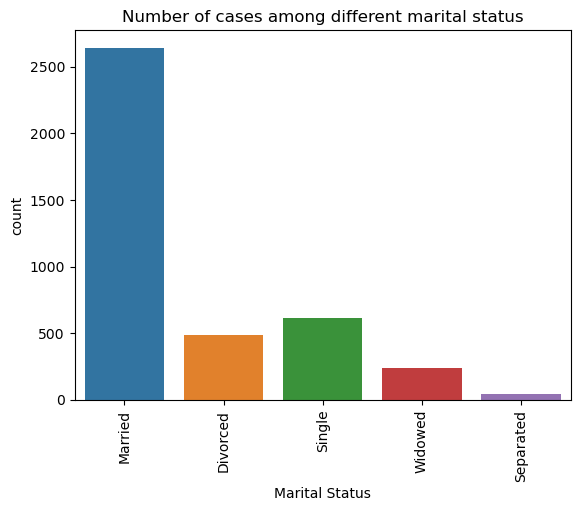

In [11]:
sns.countplot(x='Marital Status', data=df)
plt.xticks(rotation = 90)
plt.title('Number of cases among different marital status')
plt.show()

**#Categorizing patients based on their Race**

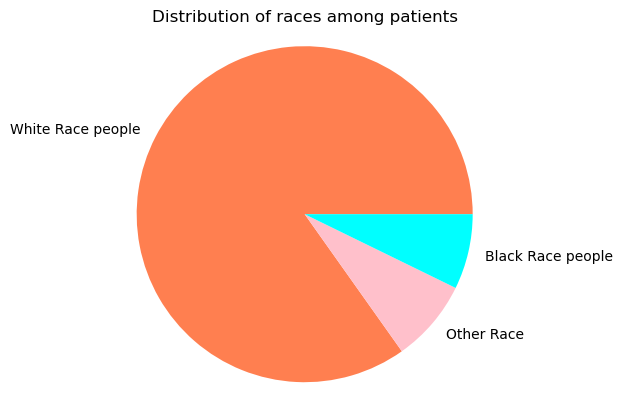

In [12]:
labels = {
    0: "White Race people",
    1: "Black Race people",
    2: "Other Race"
}

values = {
    0: 3413,
    2: 320,
    1: 291
}

race_data = pd.DataFrame(values.values(), index=values.keys(), columns=['Count'])
colors = ['coral', 'pink', 'aqua'] 
 

plt.pie(race_data['Count'], labels=[labels[key] for key in race_data.index], colors=colors,  startangle=360)
plt.title("Distribution of races among patients")
plt.axis('equal')  
plt.show()


**Size of tumor found in different patients**

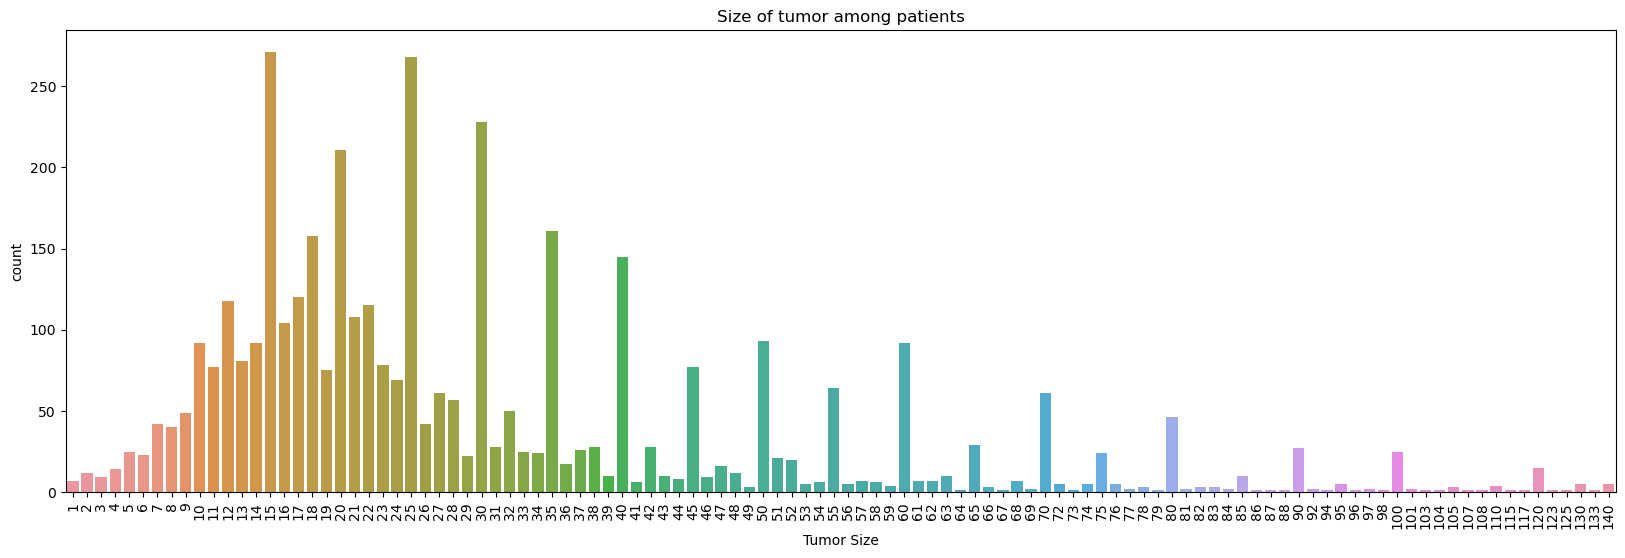

In [13]:
plt.subplots(figsize=(20,6))
sns.countplot(x='Tumor Size', data=df)
plt.xticks(rotation = 90)
plt.title('Size of tumor among patients')
plt.show()

**Counts of different count of status i.e. counts of patients that are alive or dead based on their differentiation, grades, Race, Marital Status T-Stage and N-Stage cancer**

In [14]:
df['Race'].value_counts()
df['T Stage '].value_counts()
df['N Stage'].value_counts()
df['Grade'].value_counts()
df['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

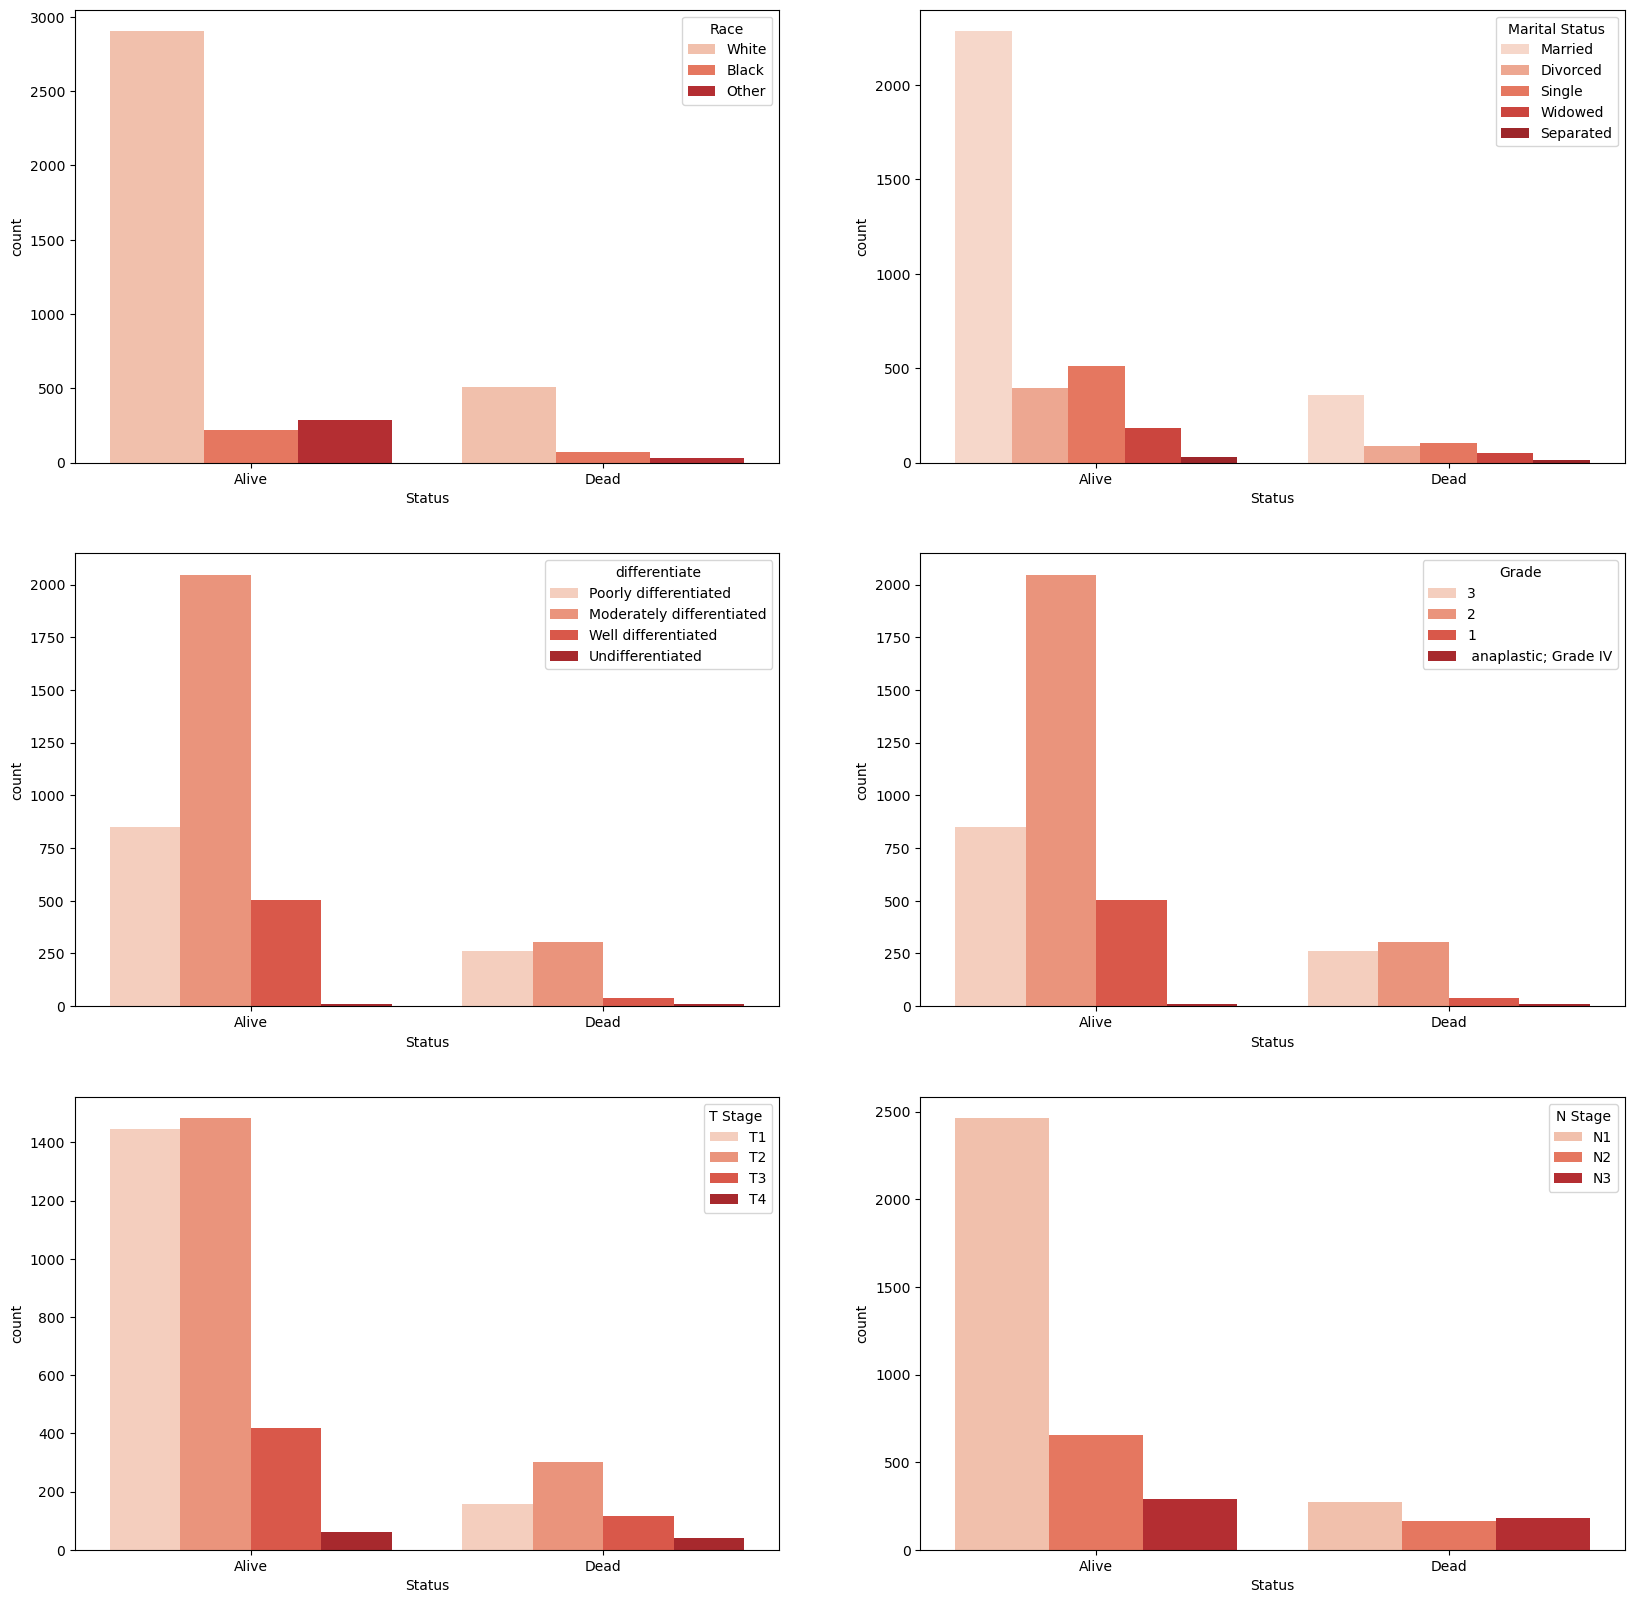

In [15]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Status', hue= 'Race', palette='Reds', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Status', hue= 'Marital Status', palette='Reds', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Status', hue= 'differentiate', palette='Reds', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Status', hue= 'Grade', palette='Reds', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'Status', hue= 'T Stage ', palette='Reds', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'Status', hue= 'N Stage', palette='Reds', data = df)

**Counts of different count of status i.e. counts of patients that are alive or dead based on their Estrogen Status, Progesterone Status, 6th Stage Cancer**

In [16]:
df['6th Stage'].value_counts()
df['Estrogen Status'].value_counts()
df['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

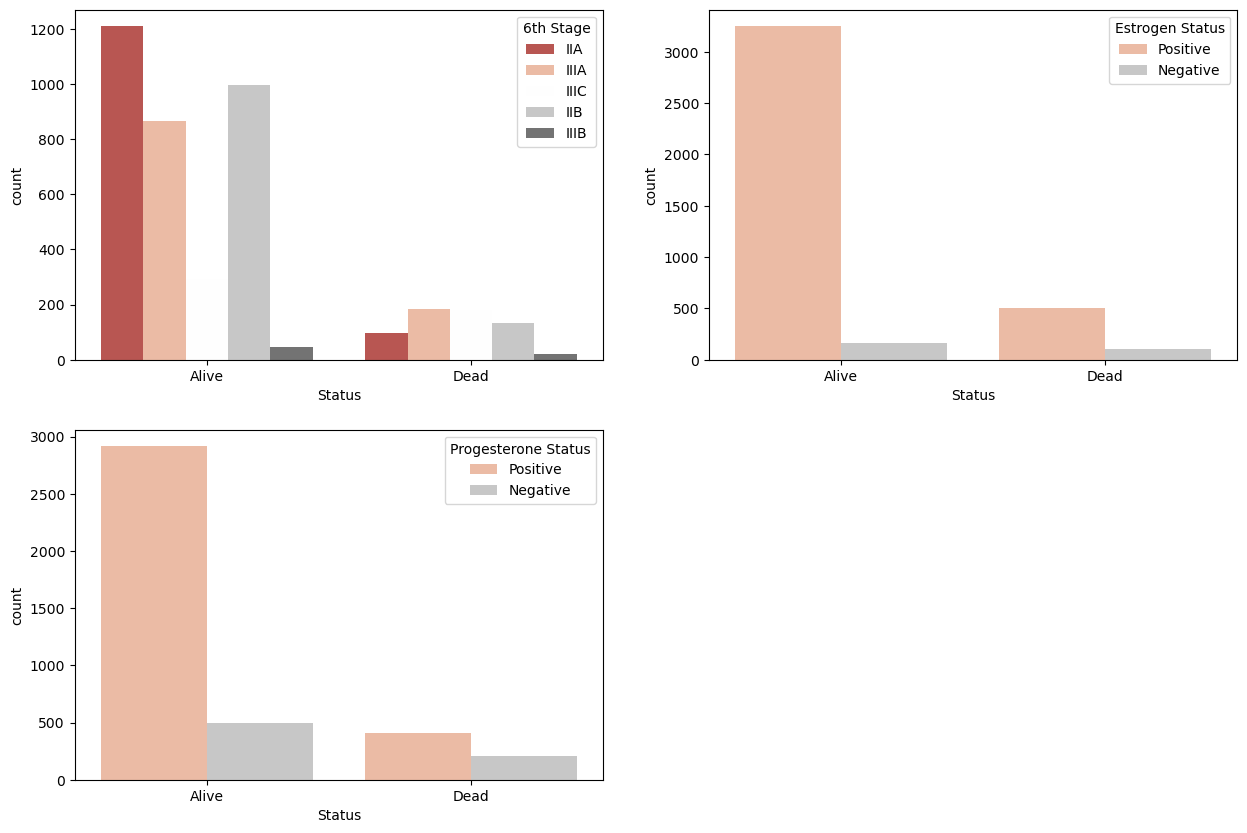

In [17]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'Status', hue= '6th Stage', palette='RdGy', data = df)

plt.subplot(2,2,2)
sns.countplot(x = 'Status', hue= 'Estrogen Status', palette='RdGy', data = df)

plt.subplot(2,2,3)
sns.countplot(x = 'Status', hue= 'Progesterone Status', palette='RdGy', data = df)


<Axes: xlabel='Age', ylabel='Count'>

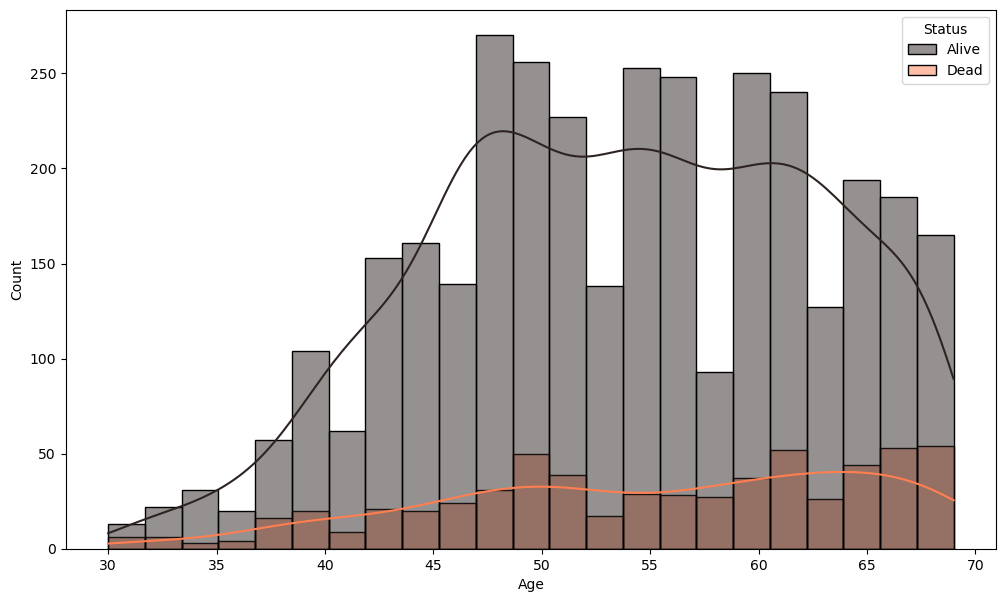

In [18]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='Age', hue='Status',palette="dark:coral",kde=True)

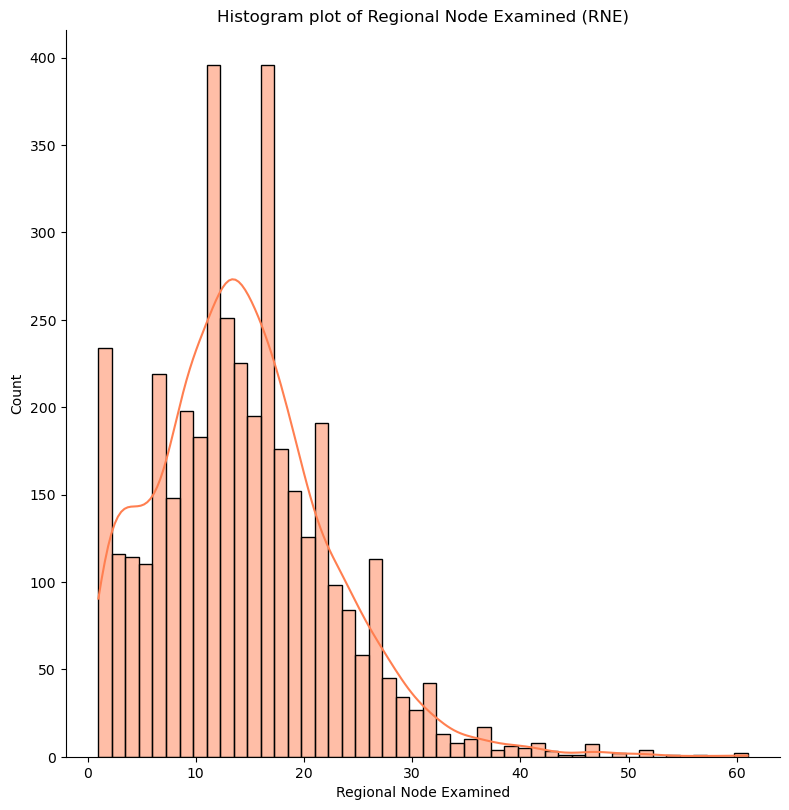

In [19]:
sns.displot(df["Regional Node Examined"], kde=True, color=("coral"),height=8,aspect=1,facet_kws=None)
plt.title("Histogram plot of Regional Node Examined (RNE)")
plt.show()

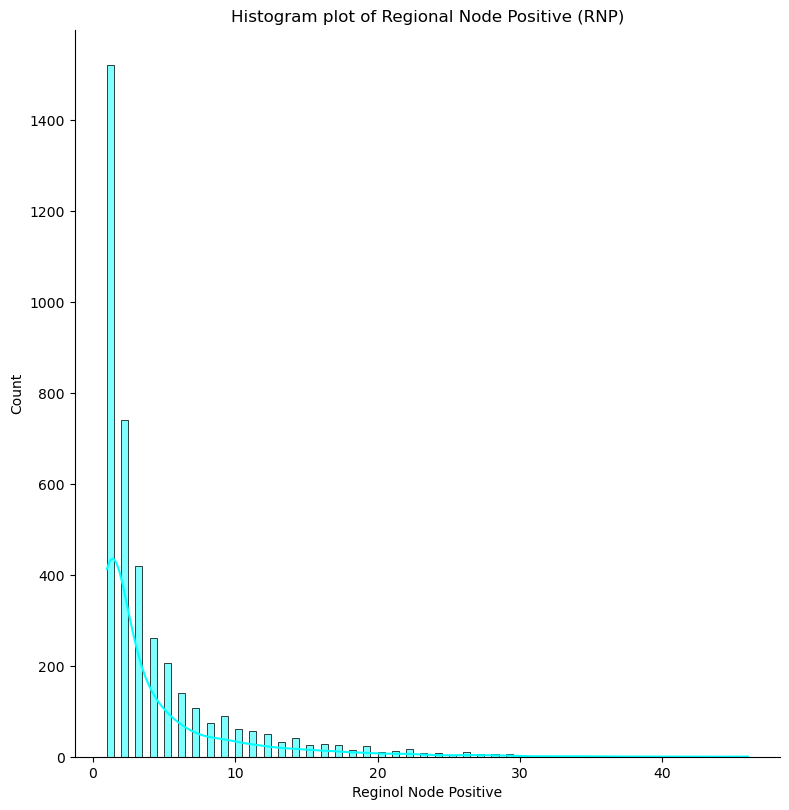

In [20]:
k = sns.displot(df['Reginol Node Positive'], kde=True, color=("aqua"),height=8,aspect=1,facet_kws=None)
plt.title("Histogram plot of Regional Node Positive (RNP)")
plt.show()

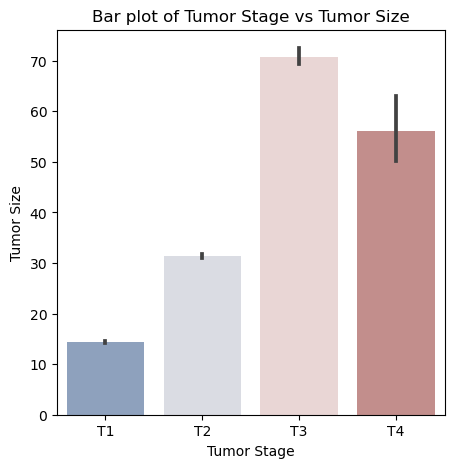

In [21]:
a4_dims = (5, 5)
fig, ax = plt.subplots(figsize=a4_dims) # 0 = T1 , 1 = T2 , 2 = T3, 3 = T4
sns.barplot(x=df['T Stage '] ,y=df['Tumor Size'],palette='vlag').set(xlabel='Tumor Stage', ylabel='Tumor Size')
plt.title("Bar plot of Tumor Stage vs Tumor Size")
plt.show()

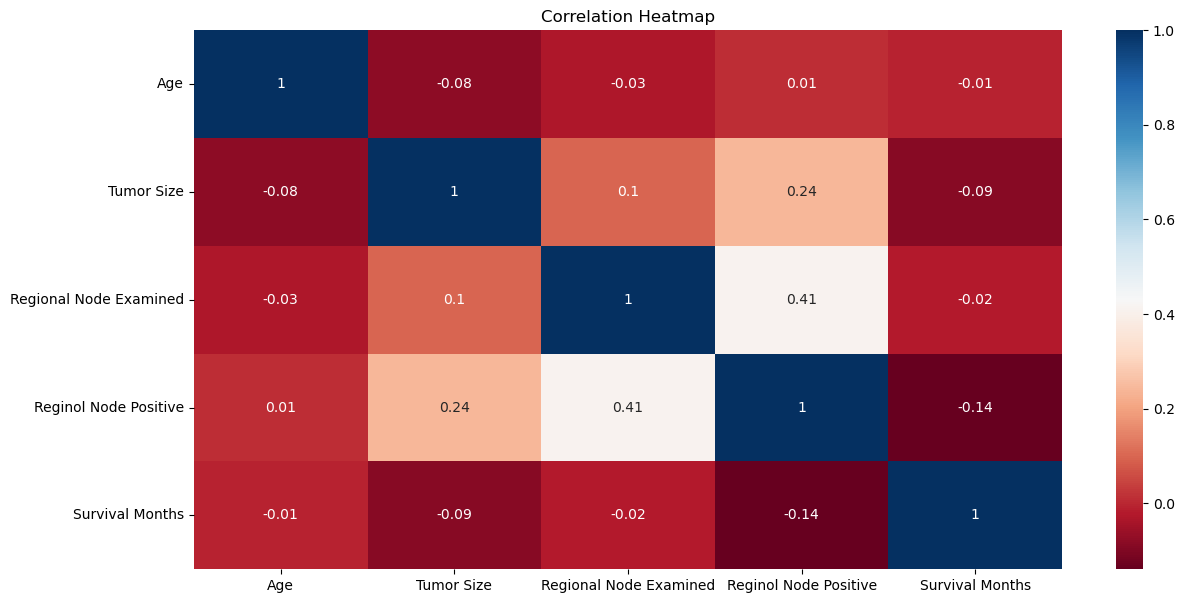

In [26]:
numerical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

numerical_data = df[numerical_columns]

correlation = numerical_data.corr().round(2)
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()
